# Telecom Company Churn Rate - EDA

### Introduction

In this European Telecom Company dataset does pricing play a role in churn?

Import libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

Load data

In [2]:
df = pd.read_csv('Data/churn_rate_cleaned.csv')
df.head(50)

,gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,num AdminTickets,num TechTickets,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,0,0,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,0,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,0,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,0,2,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,...,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [4]:
#check the columns name
df.columns

Index(['gender', 'Senior Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges',
       'num AdminTickets', 'num TechTickets', 'Churn'],
      dtype='object')

In [5]:
#Checking the data shape
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 7043 rows and 22 columns


In [6]:
# Checking the null values in the dataset
df.isna().sum()

gender                0
Senior Citizen        0
Partner               0
Dependents            0
tenure                0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
num AdminTickets      0
num TechTickets       0
Churn                 0
dtype: int64

In [7]:
# Fill in missing values
df = df.fillna(0)

In [8]:
df.isna().sum()

gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
num AdminTickets     0
num TechTickets      0
Churn                0
dtype: int64

In [9]:
# Checking the duplicate values in the data
duplicate_values=df.duplicated().sum()
print(f'The data contained {duplicate_values} duplicate values')
df = df.drop_duplicates()
df_no_duplicates=df.duplicated().sum()
print(f'The data now contains {df_no_duplicates} duplicate values')

The data contained 17 duplicate values
The data now contains 0 duplicate values


The dataset has no duplicate values, ensuring that each row represents unique information.

In [10]:
# Stastic about the data set
df.describe().style.background_gradient()

,Senior Citizen,tenure,Monthly Charges,Total Charges,num AdminTickets,num TechTickets
count,7026.000000,7026.000000,7026.000000,7026.000000,7026.000000,7026.000000
mean,0.162397,32.447054,64.834202,2285.166126,0.516225,0.420581
std,0.368841,24.540587,30.072776,2266.840359,1.275482,1.251458
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.662500,402.600000,0.000000,0.000000
50%,0.000000,29.000000,70.400000,1398.975000,0.000000,0.000000
75%,0.000000,55.000000,89.900000,3799.837500,0.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,5.000000,9.000000


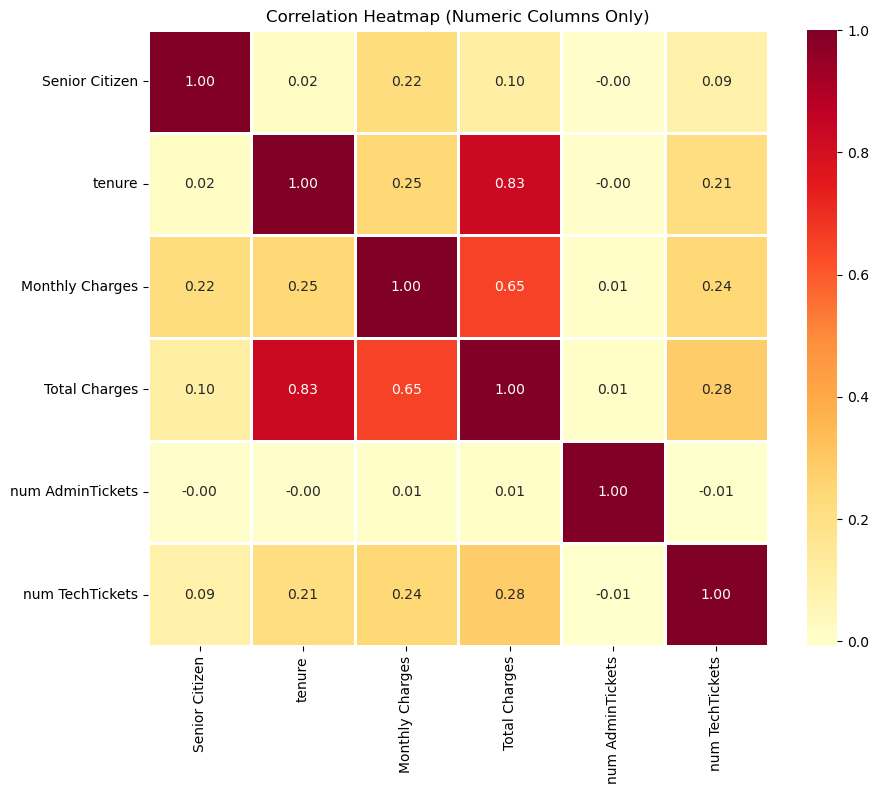

In [11]:
# Filter out only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Visualize the correlation matrix for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='YlOrRd', fmt='.2f', linewidths=1)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

## Exploratory Data Analysis

<Axes: xlabel='tenure', ylabel='Count'>

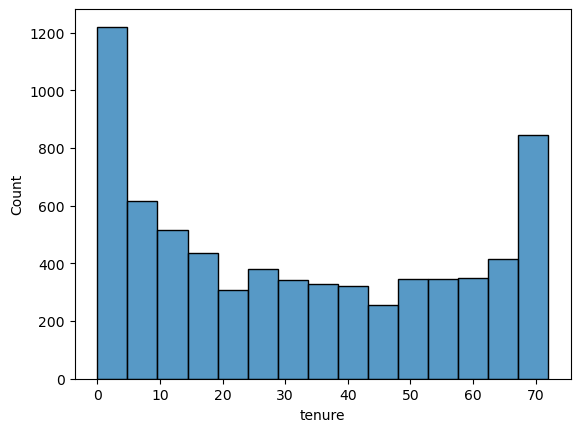

In [12]:
sns.histplot( data = df, x= df["tenure"])

The histgram shows that most customers either leave in the 1st months or stay for more than 6 years

### Term of Contract

In [13]:
# Get the count of unique values in the 'Contract' column, including NaN values
contract_counts = df["Contract"].value_counts(dropna=False)

In [14]:
contract_counts

Contract
Month-to-month    3858
Two year          1695
One year          1473
Name: count, dtype: int64

In [15]:
(df["Contract"].value_counts(dropna=False) / len(df)) * 100

Contract
Month-to-month    54.910333
Two year          24.124680
One year          20.964987
Name: count, dtype: float64

Most customers decided to go with Month-to-month contracts

### Senior Citizen

In [17]:
df["Senior Citizen"].value_counts()

Senior Citizen
0    5885
1    1141
Name: count, dtype: int64

Senior citizen customers represent 83 %

### Monthly Charges

In [ ]:
df["Monthly Charges"].value_counts(dropna=False).head(n=10)

In [ ]:
df["Monthly Charges"].describe()

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(df['Monthly Charges'])
plt.title('Distribution of monthly charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

Most consumers tend to purchase products priced around $19 or $20, making this price range a key area with significant marketing potential.

### Total Charges

In [ ]:
df["Total Charges"].value_counts()

In [ ]:
df["Total Charges"].describe()

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(df['Total Charges'])
plt.title('Distribution of total charges')
plt.xlabel('total Charges')
plt.ylabel('Count')
plt.show()

As total charges increase, the count of consumers or transactions tends to decrease. This suggests that fewer customers are willing or able to spend at higher price points, indicating a potential shift in customer behavior or a market segment that is more sensitive to price increases. This trend could have important implications for pricing strategies and customer retention efforts.

### Churn

In [ ]:
df["Churn"].value_counts()

In [ ]:
(df["Churn"].value_counts(dropna=False) / len(df)) * 100

A total of 26% of customers are canceling their subscriptions.

### Monthly Charges vs Churn

In [ ]:
plt.figure(figsize=(3,3))
sns.boxplot(x='Churn', y='Monthly Charges', data=df)
plt.title('Monthly Charges for Churned and Not Churned Customers')
plt.show()

In [ ]:
print(df.groupby('Churn')['Monthly Charges'].describe())

Churned customers apears to have a higher average value than non-churned customers. Though Non-churned customers tend to have lower monthly charges compared to churned customers.

### Total Charges vs Churn

In [ ]:
plt.figure(figsize=(3,3))
sns.boxplot(x='Churn', y='Total Charges', data=df)
plt.title('Total Charges for Churned and Not Churned Customers')
plt.show()

In [ ]:
print(df.groupby('Churn')['Total Charges'].describe())

For Total Charges churned, customers apears to have a lower total value than non-churned customers.

## Conclusion 

As observed, pricing plays a significant role in the churn rate for this European telecom company. Initially, 55% of customers opt for month-to-month contracts, which are the shortest term available and typically involve less commitment. We also see that many customers are purchasing products priced around $19 or $20, which falls at the lower end of the price range. When examining the relationship between monthly charges and Total Charges, churned customers appear to have a higher average spend than non-churned customers, suggesting that those who spend less are more likely to remain with the service.